# Queuing and Performance Analysis

## Notation
| Symbol | Meaning | Relationships |
|---|---|---|
| $\lambda$ | Arrival Rate | - |
| $\tau_a$ | Mean Inter-arrival Time | $\tau_a=1/\lambda$ |
| $\sigma_a$ | Standard deviation of inter-arrival times | - |
| $c_a$ | Coefficient of Variation of inter-arrival times | $c_a = \tau_a/\sigma_a$ |
| $\mu$ | Processing Rate | - |
| $\tau_s$ | Mean Processing Time | $\tau_s=1/\mu$ |
| $\sigma_s$ | Standard deviation of processing times | - | 
| $c_s$ | Coefficient of Variation of inter-arrival times | $c_s = \tau_s/\sigma_s$ |
| $L$ | Mean number of jobs in system | - |
| $W_q$ | Mean time spent queueing by job | - |
| $W$ | Sojourn time, time spent in system by job | $W = W_q + \tau_s$ |
| $\rho$ | Utilization | $\rho = \lambda / \mu = \tau_s / \tau_a$ |
| $QF$ | Queuing Factor | $QF = W / \tau = 1 + W_q / \tau$ |
| $E[w]$ | Expectation of random variable $w$ | - |

## Key Equations

| Equation | Formula | Notes |
|---|---|---|
| Little's Law | $L = \lambda W$ | - |
| M/M/1 Wait Time | $E[W_q] = \tau_s \frac{\rho}{1-\rho}$ | [Wikipedia](https://en.wikipedia.org/wiki/M/M/1_queue) |
| M/M/1 Sojourn Time | $E[W] = \tau_s \frac{1}{1-\rho}$ | [Wikipedia](https://en.wikipedia.org/wiki/M/M/1_queue) |
| G/G/1 Wait Time | $E[W_q] \approx \tau_s \left( \frac{\rho}{1-\rho} \right) \left( \frac{c_a^2+c_s^2}{2}\right)$ | [Wikipedia](https://en.wikipedia.org/wiki/G/G/1_queue) |
| G/G/1 Sojourn Time | $E[W_q] \approx \tau_s + \tau_s \left( \frac{\rho}{1-\rho} \right) \left( \frac{c_a^2+c_s^2}{2}\right)$ | [Wikipedia](https://en.wikipedia.org/wiki/G/G/1_queue) |

# Jupyter Help

* [Symbolic Math](https://dynamics-and-control.readthedocs.io/en/latest/0_Getting_Started/Notebook%20introduction.html)
* [Latex Math](https://tilburgsciencehub.com/building-blocks/collaborate-and-share-your-work/write-your-paper/amsmath-latex-cheatsheet/)
* [More Latex Match Cheatsheet](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)



In [1]:
import sympy

sympy.init_printing()



In [2]:
x = sympy.Symbol('x')
polynomial = (2*x + 3)**4
polynomial.expand()


# Symbolic Representation

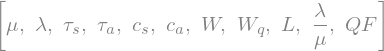

In [25]:
## Symbol Declararions
tau_s = sympy.Symbol('tau_s')
tau_a = sympy.Symbol('tau_a')
c_s = sympy.Symbol('c_s')
c_a = sympy.Symbol('c_a')

mu = sympy.Symbol('mu')
s_lambda = sympy.Symbol('lambda')
#rho = sympy.Symbol('rho')
rho = s_lambda/mu

W = sympy.Symbol('W')
W_q = sympy.Symbol('W_q')
L = sympy.Symbol('L')
QF = sympy.Symbol('QF')

[mu, s_lambda, tau_s, tau_a, c_s, c_a, W, W_q, L, rho, QF]

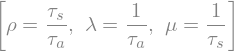

In [4]:
## Basic Relationships
utilization = sympy.Eq(rho, tau_s / tau_a)
arrival_rate = sympy.Eq(s_lambda, 1 / tau_a)
processing_rate = sympy.Eq(mu, 1 / tau_s)

[utilization, arrival_rate, processing_rate]


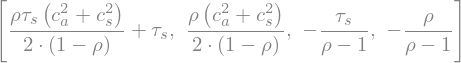

In [5]:
"""
## MM1 & GG1
"""
W_gg1 = tau_s + tau_s * (rho/(1-rho)) * (c_a**2+c_s**2) / 2
QF_gg1 = (W_gg1 - tau_s)/tau_s
W_mm1 = sympy.simplify(W_gg1.subs([(c_a, 1.0), (c_s, 1.0)]))
QF_mm1 = sympy.simplify((W_mm1-tau_s)/tau_s)

[W_gg1, QF_gg1, W_mm1, QF_mm1]


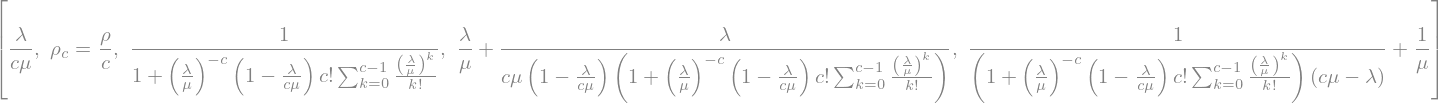

In [27]:
"""
## M/M/c
"""
c = sympy.Symbol('c')
#rho_c = sympy.Symbol('\\rho_c')
rho_c = rho/c

#utilization_c = sympy.Eq(rho_c, rho/c)

k = sympy.Symbol('k')

erlangC = 1/(1 + (1-rho_c)*(sympy.factorial(c)/(c*rho_c)**c)*sympy.Sum((c*rho_c)**k/sympy.factorial(k), (k, 0, c -1)))

L_c = (rho_c/(1-rho_c))*erlangC+c*rho_c

W_c = erlangC/(c*mu - s_lambda)+ 1/mu

[
    rho_c,
    utilization_c,
    erlangC,
    L_c,
    W_c
]


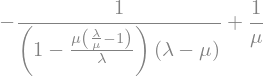

In [28]:
sympy.simplify(W_c.subs([(c, 1)]))

# Numerical Examples and Graphs